In [1]:
import pandas as pd
import numpy as np
f = pd.read_csv("cleaned_reddit.csv")


A quick look at the flavors with the most positive refrences 

In [2]:
f.sort_values(["Positive"], ascending=[False]).head()

,Flavor Name,Positive,Negative
162,strawberry,18265,4732
260,caramel,10032,5130
156,raspberry,6624,2592
268,banana,5028,2808
352,tobacco,4449,2070


A quick look at the flavors with the most negative refrences

In [3]:
f.sort_values(["Negative"], ascending=[False]).head()

,Flavor Name,Positive,Negative
342,watermelon,2338,5320
260,caramel,10032,5130
162,strawberry,18265,4732
368,coconut,3182,3612
268,banana,5028,2808


Raw numbers are show some detail but not the full picture, but the most commonly mentioned flavors drown out everything else. Why not use percent instead? First Adding a total column to make life easier.

Positive Percent is positive mentions / total mentions

Negative Percent is negative mentions / total mentions


In [4]:
f["Total"] = f["Positive"]+f["Negative"]

In [5]:
f["Percent_Positive"] = f["Positive"]/f["Total"]
f.sort_values(["Percent_Positive", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Percent_Positive
250,cinnamon danish,55,0,55,1.0
167,chocolate cream,27,0,27,1.0
317,caramel original,20,0,20,1.0
210,toasted marshmallow,15,0,15,1.0
179,vanilla butternut,14,0,14,1.0


Here we have sorted the most positive flavors for their percent rating and total rating. We can see Cinnamon Danish is the "most positive" flavor in the data set. 

In [6]:
f["Percent_Negative"] = f["Negative"]/f["Total"]
f.sort_values(["Percent_Negative", "Total"], ascending=[False, False]).head()

,Flavor Name,Positive,Negative,Total,Percent_Positive,Percent_Negative
240,caramel candy,0,32,32,0.0,1.0
267,yougurt,0,22,22,0.0,1.0
169,yumberry,0,13,13,0.0,1.0
164,white out,0,8,8,0.0,1.0
233,apple sour,0,8,8,0.0,1.0


We have sorted the most negative flavors in the same manner we sorted positive flavors. We can see Caramel Candy is the "most negative" flavor followed closely by yougurt.

Finally, some quick figures.


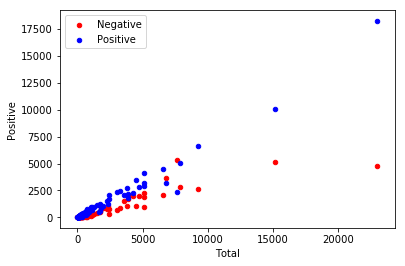

In [7]:
%matplotlib inline
ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);

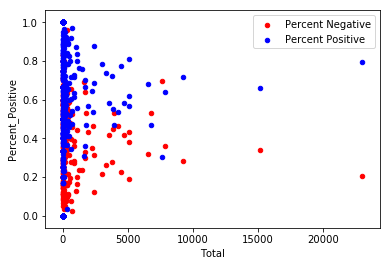

In [8]:
ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);

Here we remove the highest values so generate some clearer figures.

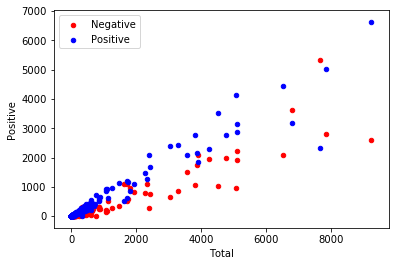

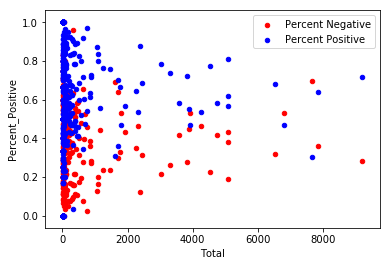

In [9]:
f = f[f["Positive"] < 10000]
f["Total"] = f["Positive"]+f["Negative"]
f["Percent_Positive"] = f["Positive"]/f["Total"]
f["Percent_Negative"] = f["Negative"]/f["Total"]

ax = f.plot.scatter(x='Total', y='Negative', color='Red', label='Negative')
f.plot.scatter(x='Total', y='Positive', color='Blue', label='Positive', ax=ax);


ax = f.plot.scatter(x='Total', y='Percent_Negative', color='Red', label='Percent Negative')
f.plot.scatter(x='Total', y='Percent_Positive', color='Blue', label='Percent Positive', ax=ax);